<a href="https://colab.research.google.com/github/rdgdelfino/MVP_DataAnalytics/blob/main/MVP_Datanalysis_Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas
**Dataset:** [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)

# 1. Descrição do Problema

O conjunto de dados Credit Score Classification é um conjunto de dados multivariado que contém informações sobre o sucesso de uma campanha de Marketing de instituição financeira portuguesa. A campanha foi realizada a partir de ligações telefônica e o cliente pode ter sido contatado mais de uma vez. O objetivo é avaliar a campanha realizada e também utilizar seus dados para **classificar futuros clientes** quanto a sua propensão a adquirir um novo produto financeiro a partir de um modelo de machine learning.

##1.1 Hipóteses do Problema


- Clientes que são contatados mais de uma vez tendem a não contratar o produto.

- Clientes que já possuem empréstimos tendem a não contratar novos produtos financeiros.

- Clientes com maior saldo financeiro anual tendem a contratar novos produtos financeiros.

## 1.2 Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características da performance de uma campanha de marketing, o objetivo é prever se novos clientes contratariam ou não um produto financeiro com seu banco.

##1.3 Seleção de Dados

O dataset Bank Marketing é um conjunto de dados disponível no UCI Machine Learning Repository, criado em 2012.

##1.4 Atributos do Dataset

* **age (Numérica)**: Idade do cliente.
* **job (Categórica)**: Ocupação do cliente (ex.: admin., blue‑collar, technician, etc.)
* **marital (Categórica)**: Estado civil (married, single, divorced — inclui viúvos, unknown)
* **education (Categórica)**: Nível de instrução
* **default (Binária)**: Indica se o cliente tem crédito em default (yes/no)
* **balance (Numérica)**: Saldo médio anual em euros
* **housing (Binária)**: Indica se o cliente possui empréstimo habitacional (yes/no)
* **loan (Binária)**: Indica se o cliente possui empréstimo pessoal (yes/no)
* **contact (Categórica)**: Meio de contato (cellular ou telephone)
* **day (Númerica)**: Dia do último contato
* **month (Categórica)**: Mês do último contato
* **duration (Numérica)**: Duração do último contato em segundos (usar só para benchmarks, pois só está disponível após o contato)
* **campaign (Numérica)**: Número de contatos realizados nesta campanha (inclui o atual)
* **pdays (Numérica)**: Dias desde o último contato de uma campanha anterior (valor −1 indica nunca foi contatado)
* **previous (Numérica)**: Número de contatos realizados antes desta campanha
* **poutcome (Categórica)**: Resultado da campanha anterior (failure, nonexistent/other, success)
* **y (Binária)**: Variável alvo — indicadora se o cliente subscreveu um depósito a prazo (yes/no)



##1.5 Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

#2. Análise e Tratamento de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
palette = "PuBu"

In [2]:
# Importando o Dataset via url

url = "https://raw.githubusercontent.com/rdgdelfino/MVP_DataAnalytics/refs/heads/main/BankMarketing.csv"
df = pd.read_csv(url,sep=';')

In [3]:
# primeiras linhas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Apesar de um entendimento inicial, partir das primeiras linhas do dataset, podemos perceber que a variável balance parece ter um grande faixa de valores. Esta suspeita será explorada mais a frente ao analisar as principais métricas do dataset.

##2.1 Total e Tipo das Instâncias

A partir de uma análise inicial, pode-se observar que, há 17 variáveis e 45.211 observações no dataset e nenhum deles possui campos faltantes. O tipo das variáveis no dataframe correspondem ao tipo de informação nelas armazanedas, portando não há necessidade de realizar transformações e tratamento em seus tipos.

In [4]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 45211

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


A partir de uma contagem, pode-se concluir que o dataset é uma base desbalanceada, porque as 45.211 observações estão distribuídas desigualmente entre as classes da váriavel resposta **y**, sendo 88% dos registros na variável como "Não" e 12% na como "Sim.

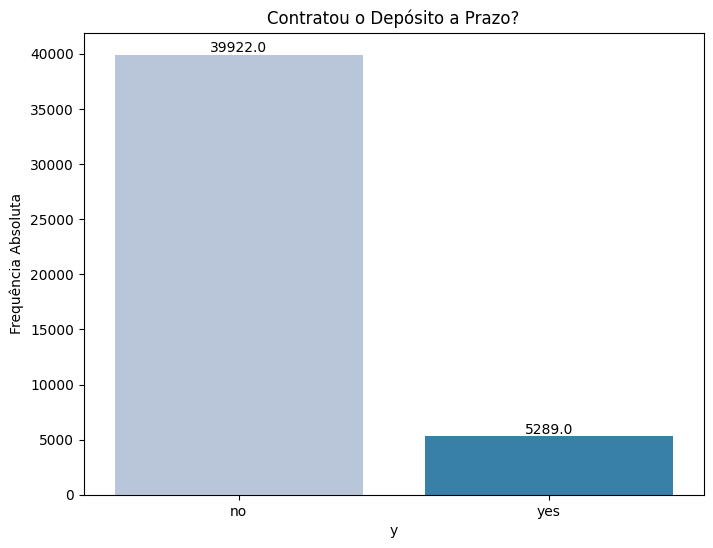

In [5]:
# Contagem de observações por variável alvo - gráfico de barras simples

# Cria a contagem para a variável Credit_Score
counts = df['y'].value_counts().reset_index()

# Cria o gráfico de barras com seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='y', y='count', data=counts, palette=palette, hue='y', legend=False)

# Adiciona as labels com os valores absolutos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Contratou o Depósito a Prazo?')
plt.xlabel('y')
plt.ylabel('Frequência Absoluta')
plt.show()


##2.2 Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [6]:
# Estatísticas descritivas básicas do dataset
# Define formatação para floats: separador de milhar e 2 casas decimais
pd.set_option('display.float_format', '{:,.2f}'.format)
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


* **age (Numérica)**: Os valores mínimo e máximo de idade são plausíveis, e a proximidade entre a média e a mediana sugere uma distribuição relativamente simétrica, com pouca influência de outliers.

* **balance (Numérica)**: Há uma grande diferença entre a média e a mediana, e o valor máximo é quase 200 vezes maior que a mediana. Esses indícios apontam para a presença de outliers significativos nesse campo.

* **day (Numérica)**: Os valores registrados são compatíveis com dias do mês, e as medidas de tendência central estão próximas de 15, indicando uma distribuição equilibrada ao longo do mês.

* **duration (Numérica)**: A média e a mediana estão afastadas, e o valor máximo é bastante elevado em relação à mediana, o que indica a possível presença de valores extremos (outliers).

* **campaign (Numérica)**: Apesar de a média e a mediana estarem próximas, o valor máximo é muito distante dos demais, sugerindo a ocorrência de casos atípicos.

* **pdays (Numérica)**: Apresenta forte assimetria, com média e mediana bastante diferentes e um valor máximo muito superior à mediana, reforçando a hipótese de outliers e uma distribuição altamente distorcida.

* **previous (Numérica)**: Embora a média e a mediana estejam próximas, o valor máximo é muito superior ao mínimo e à própria mediana, o que pode indicar a presença de valores extremos pontuais.

###2.3 Outliers

O tratamento de outliers é fundamental para garantir a qualidade e a confiabilidade das análises estatísticas em um conjunto de dados. Outliers, valores que se desviam significativamente do padrão geral, podem distorcer medidas importantes como a média, o desvio padrão e até influenciar modelos preditivos, levando a interpretações equivocadas e decisões incorretas. Ao identificar e lidar adequadamente com esses valores extremos, seja por meio de sua exclusão, transformação ou substituição, é possível obter estatísticas mais representativas da realidade e construir modelos analíticos mais robustos e precisos. Assim, o tratamento de outliers é uma etapa essencial na preparação dos dados para análises mais confiáveis e eficazes.

Para visualizar os outliers da base, usaremos gráficos Boxplot.

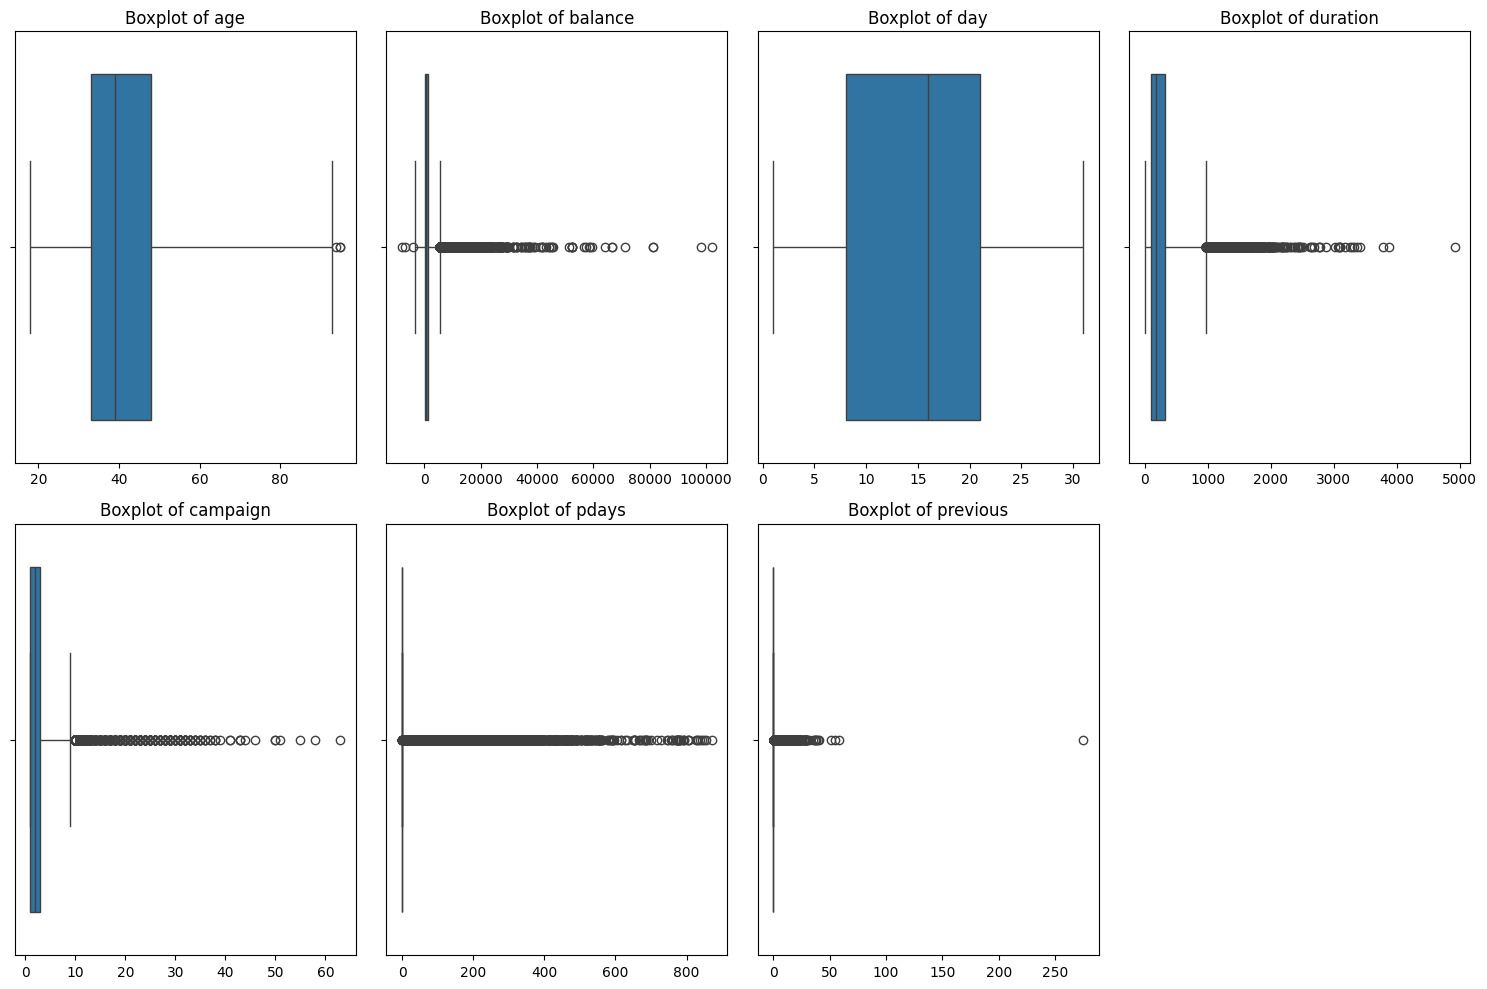

In [7]:
# Separando as colunas numéricas
colunas_numericas = df.select_dtypes(include='number').columns.tolist()

# Criando um grid de plots para visualizar outliers.
n_cols = 4
n_linhas = (len(colunas_numericas) + n_cols - 1) // n_cols

# Criando subplots
fig, axes = plt.subplots(n_linhas, n_cols, figsize=(15, n_linhas * 5))
axes = axes.flatten()

# Plotando um boxplot para cada coluna numérica
for i, col in enumerate(colunas_numericas):
    sns.boxplot(x=df[col], ax=axes[i],whis=3)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


A partir da análise dos gráficos, vemos que existem muitos valores outliers para a variáveis do dataset. Remover estas linhas significaria perder 40% das observações e transformar estes valores usando a mediana poderia gerar perda de características importantes do dataset.

In [8]:
# Criando um dataset sem os outliers.

def remover_outliers_iqr(df, colunas, fator=1.5):
    df_limpo = df.copy()
    for col in colunas:
        Q1 = df_limpo[col].quantile(0.25)
        Q3 = df_limpo[col].quantile(0.75)
        IQR = Q3 - Q1

        limite_inf = Q1 - fator * IQR
        limite_sup = Q3 + fator * IQR

        df_limpo = df_limpo[(df_limpo[col] >= limite_inf) & (df_limpo[col] <= limite_sup)]
    print(f"Ao eliminar as linhas com outliers, o dataset ficaria com {len(df_limpo)} linhas. Cerca de {round(len(df_limpo)/len(df)*100,2)}% do DF original")
    return

remover_outliers_iqr(df, colunas_numericas)

Ao eliminar as linhas com outliers, o dataset ficaria com 28069 linhas. Cerca de 62.08% do DF original


A decisão tomada foi identificar os outliers a partir do Z-Score, que classificou menos observações como outlier, para que o tratamento dos outliers não comprometesse distribuições próprias da população. Identificadas as anamolias, os valores foram substituídos pela mediana.

In [9]:
# Tratar outliers usando Z-score

df_silver = df.copy()

def detectar_outliers_zscore(df, coluna, limite_zscore=3):

  media = df[coluna].mean()
  mediana = df[coluna].median()
  desvio_padrao = df[coluna].std()
  z_scores = (df[coluna] - media) / desvio_padrao

  outliers = np.abs(z_scores) > limite_zscore
  df_silver.loc[outliers, coluna] = mediana
  return outliers

for col in colunas_numericas:
# Exemplo de uso para a coluna 'balance'
  outliers_balance = detectar_outliers_zscore(df, col)
  print(f"Número de outliers na coluna {col} (Z-score > 3): {outliers_balance.sum()}")



Número de outliers na coluna age (Z-score > 3): 381
Número de outliers na coluna balance (Z-score > 3): 745
Número de outliers na coluna day (Z-score > 3): 0
Número de outliers na coluna duration (Z-score > 3): 963
Número de outliers na coluna campaign (Z-score > 3): 840
Número de outliers na coluna pdays (Z-score > 3): 1723
Número de outliers na coluna previous (Z-score > 3): 582


In [10]:
# Verificar as estatísticas do dataset tratado
df_silver.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.61,"1,074.06",15.81,232.65,2.45,25.59,0.41
std,10.04,"1,708.75",8.32,188.82,1.92,72.06,1.12
min,18.00,"-6,847.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,322.00",21.00,301.00,3.00,-1.00,0.00
max,72.00,"10,483.00",31.00,"1,030.00",12.00,340.00,7.00


Após o tratamento dos valores extremos, o intervalo de valores das variáveis diminuiu significativamente e os valores da média e da mediana se aproximaram, como era o esperado. Ainda é possível identificar valores classificados como outliers no Bloxpot com fator multiplicativo 1.5(padrão). Mas como decisão, será mantido desta maneira para não modificar excessivamente os dados.

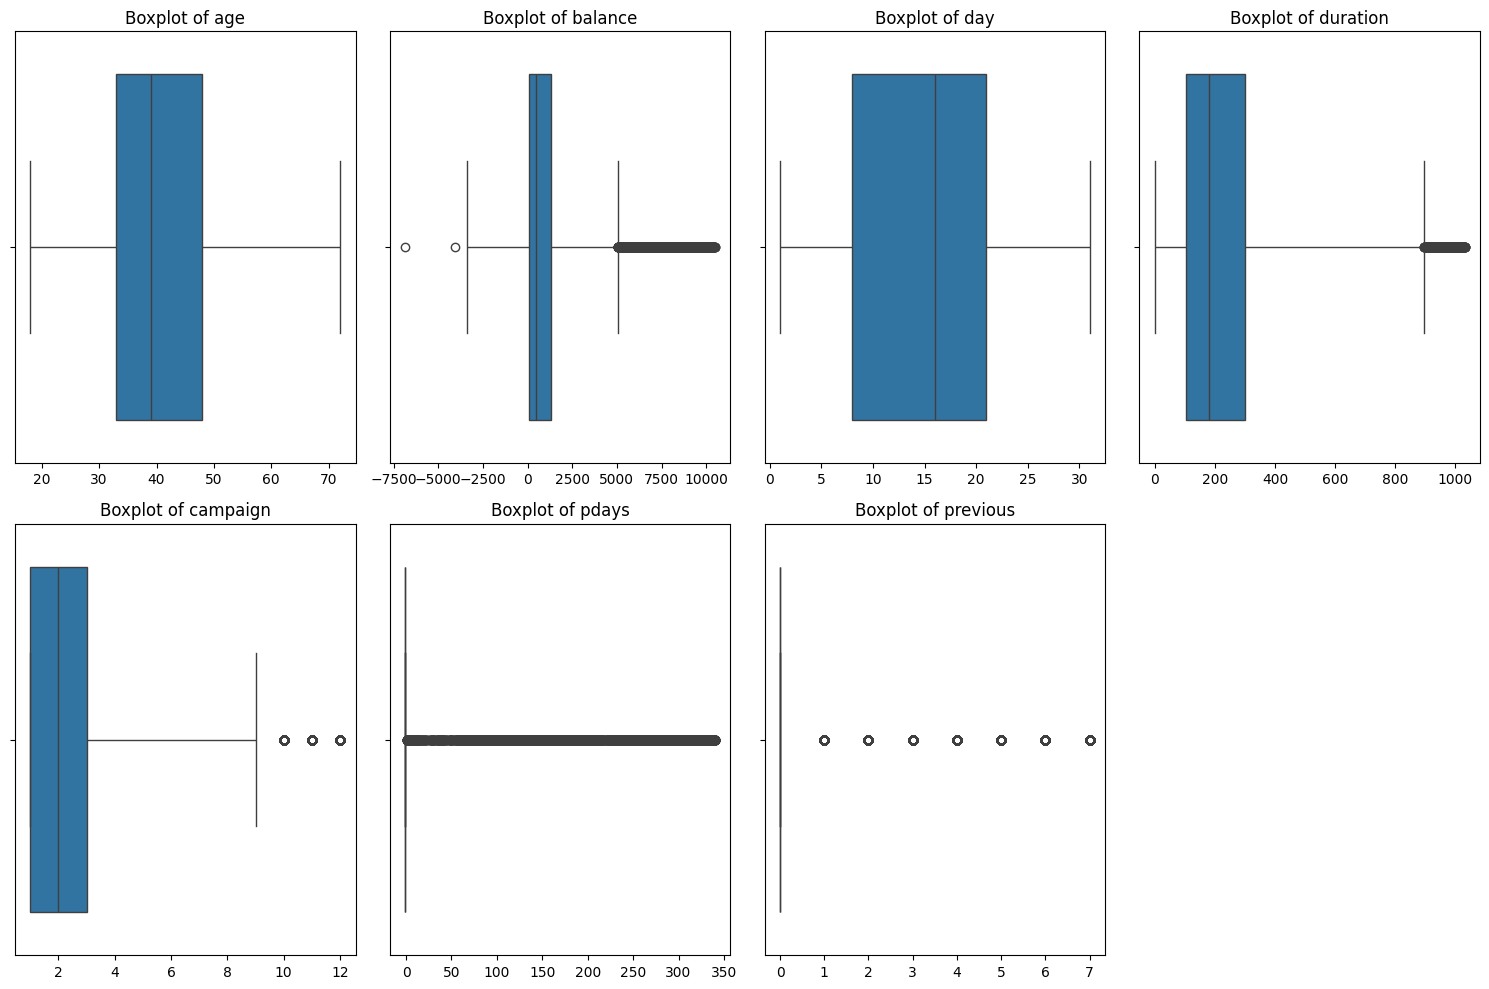

In [11]:
# Criando um grid
n_cols = 4
n_linhas = (len(colunas_numericas) + n_cols - 1) // n_cols

# Criando subplots
fig, axes = plt.subplots(n_linhas, n_cols, figsize=(15, n_linhas * 5))
axes = axes.flatten()

# Plotando um boxplot para cada coluna numérica
for i, col in enumerate(colunas_numericas):
    sns.boxplot(x=df_silver[col], ax=axes[i], whis=3)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('') # Remove x-axis label to avoid clutter

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##2.4 Histograma

A partir de histogramas, será realizada uma análise da distribuição das variáveis categóricas e binárias presentes no dataset. Esse tipo de visualização permite observar a frequência com que cada categoria ocorre, facilitando a identificação de desequilíbrios, padrões ou possíveis inconsistências nos dados. Para variáveis binárias, o histograma ajuda a verificar a proporção entre as duas classes, o que é essencial para avaliar possíveis enviesamentos que podem impactar análises futuras ou modelos preditivos. Dessa forma, o histograma se mostra uma ferramenta eficaz para a compreensão inicial da estrutura dos dados categóricos.

Além da distribuição das variáveis categóricas é importante cruzar cada categória com a variável preditiva, para entender a influência de cada uma delas para o modelo.

* **job**: É uma variável bimodal, sendo as profissões de gestão e operárias, as mais representativas. O grupo dos estudantes e dos aposentados são os mais propensos contratar o produto.
* **marital (Categórica)**: O estado civil "Casado" é o mais representativo do dataset. O sucesso da campanha está distribuído de forma similar entre as classes.
* **education (Categórica)**: O principal nível de instrução dos clientes é ensino médio, seguido de ensino superior.  O sucesso da campanha está distribuído de forma similar entre as classes.
* **default (Binária)**: A grande maioria dos clientes não possui crédito em atraso. O sucesso da campanha é pequeno, mas é duas vezes maior entre os clientes que não possuem crédito.
* **housing (Binária)**: A grande maioria dos clientes possui empréstimo residencial.O sucesso da campanha é pequeno, mas é duas vezes maior entre os clientes que não possuem empréstimo.
* **loan (Binária)**: A grande maioria dos clientes não possui empréstimo que não seja o residencial. O sucesso da campanha é pequeno, mas é duas vezes maior entre os clientes que não possuem empréstimo.
* **contact (Categórica)**: O celular foi a principal forma de contato com os clientes da campanha. O sucesso da campanha foi menor entre os clientes de que não se conhece a forma de contato.
* **month (Categórica)**: Maio foi o mês que a grande maioria dos clientes foi contatado pela última vez. Os meses de Março, Setembro, Outubro e Dezembro foram quando houve maior adesão a campanha.
* **poutcome (Categórica)**: O resultado da campanha anterior é desconhecida para maioria dos clientes. O sucesso da campanha é significativamente maior entre os clientes que aderiram a campanha de marketing anterior.

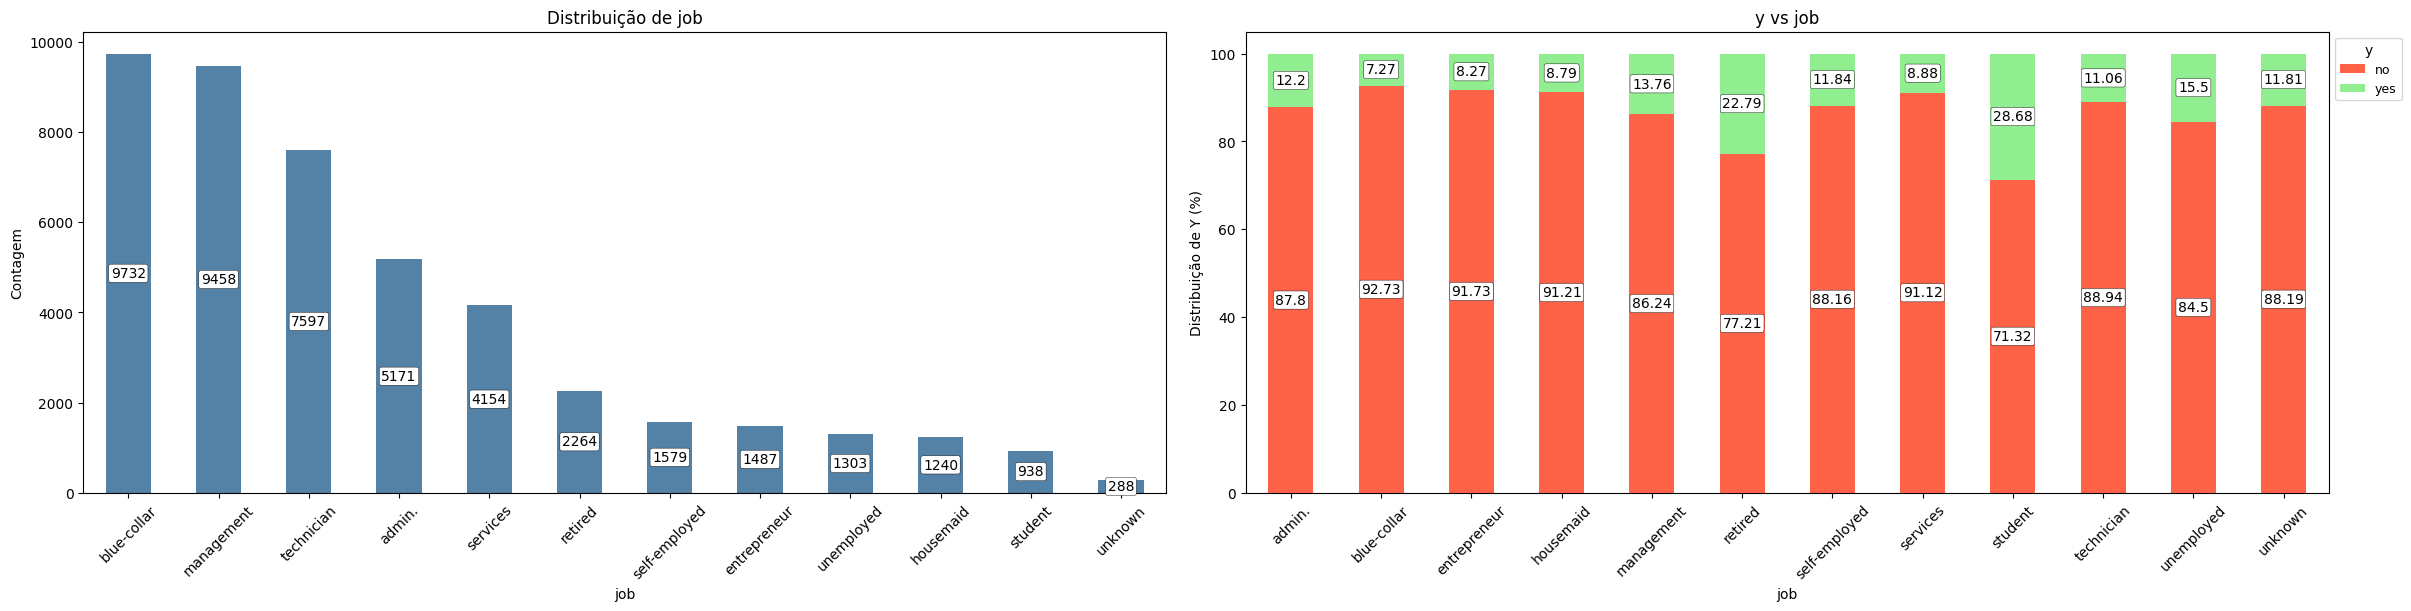

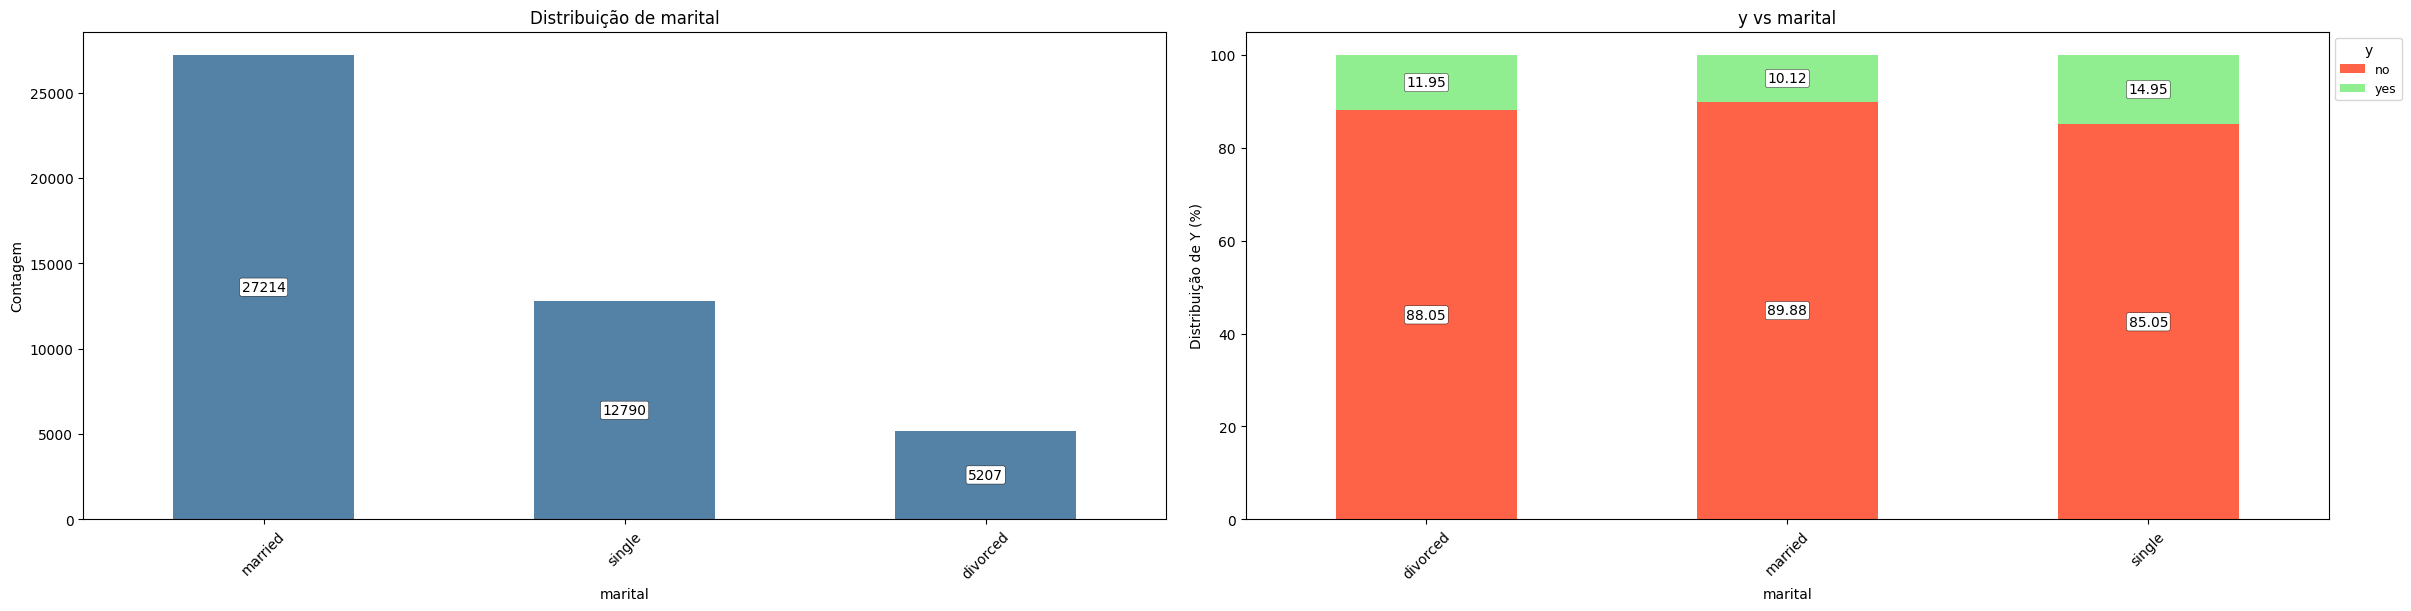

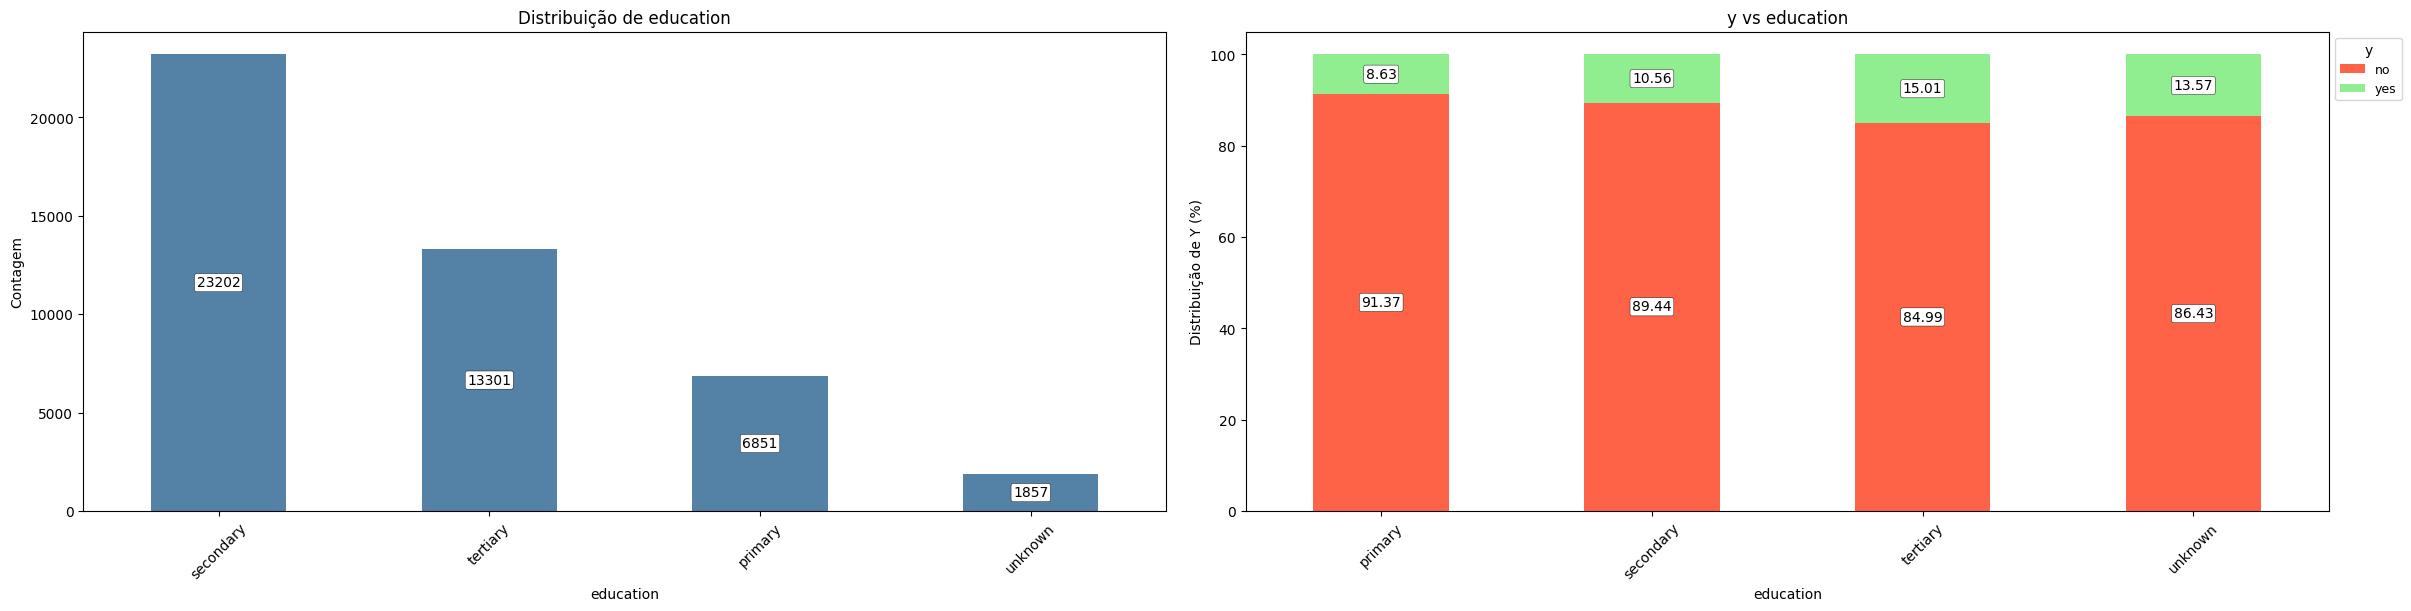

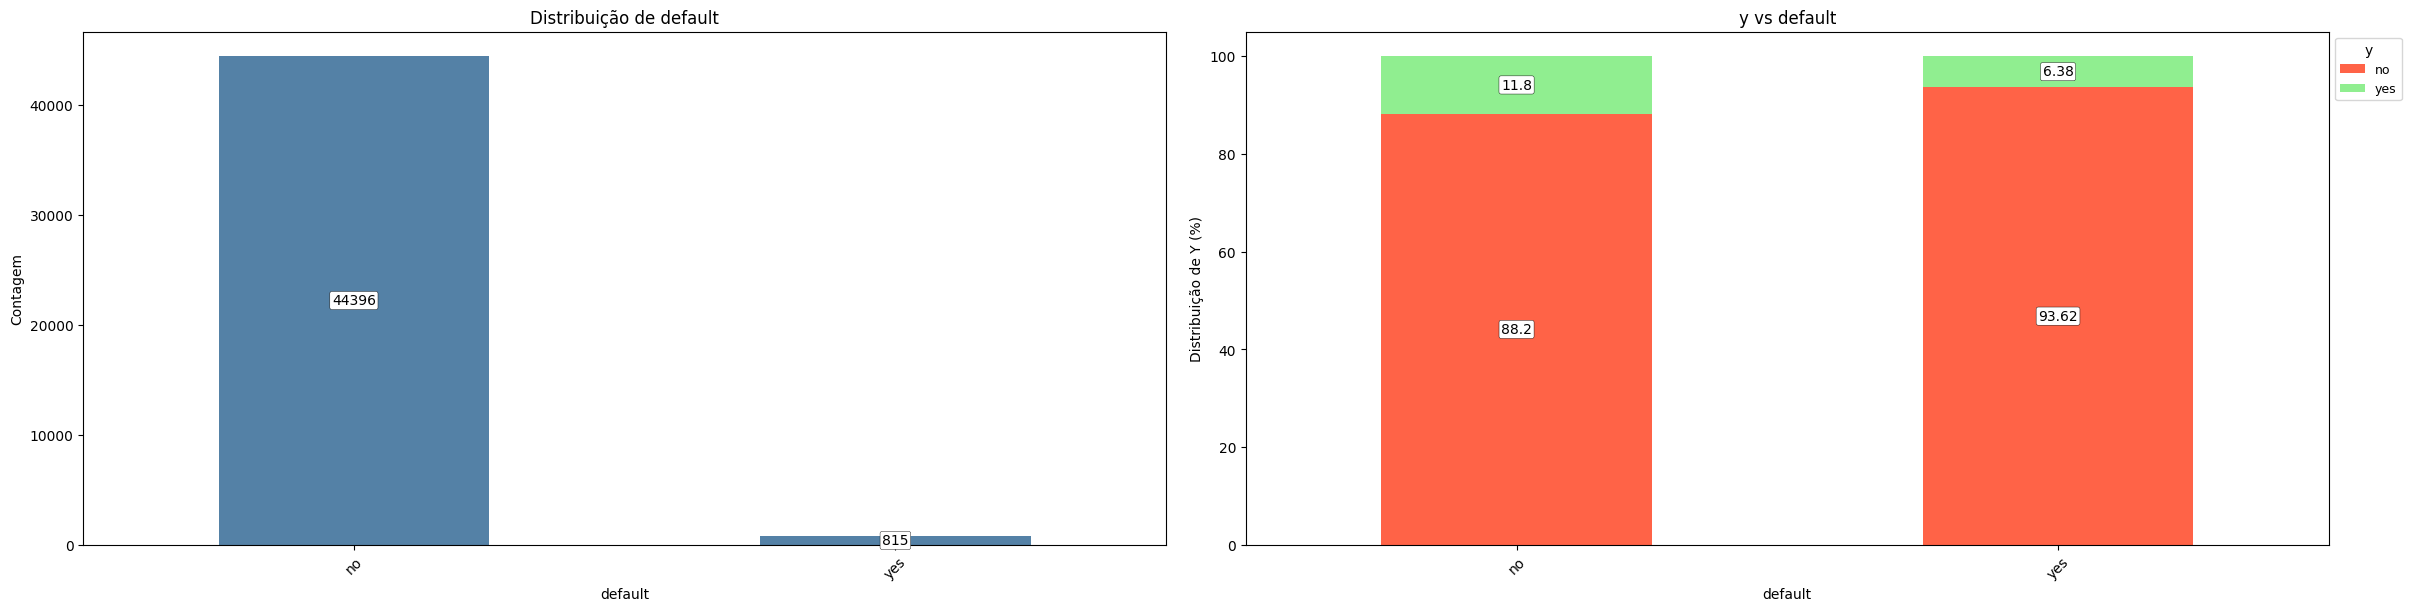

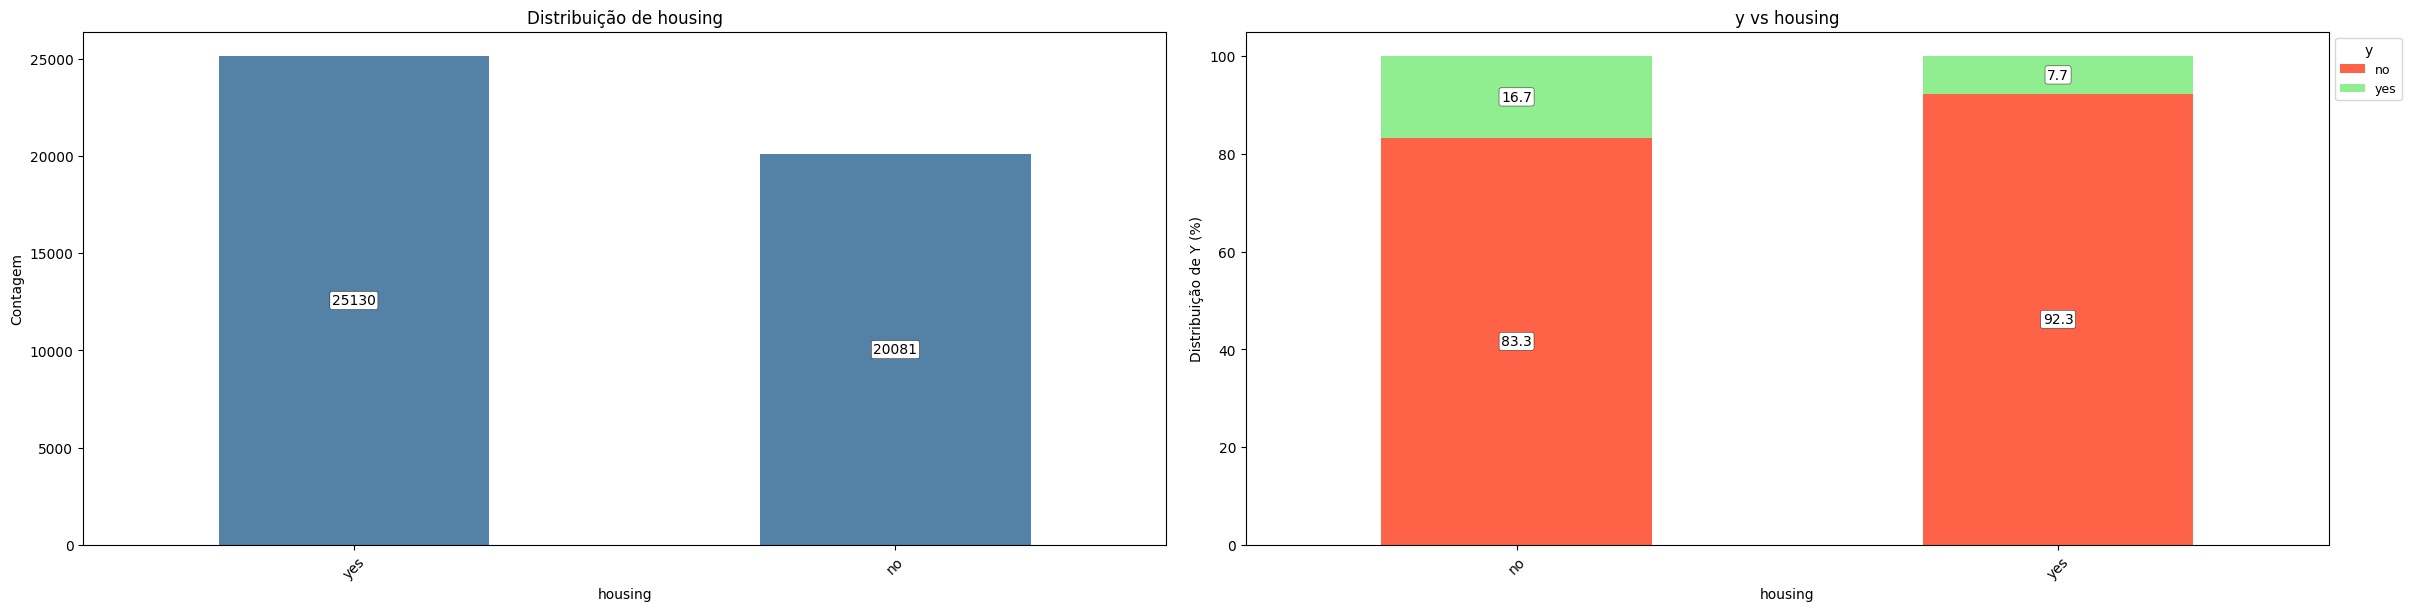

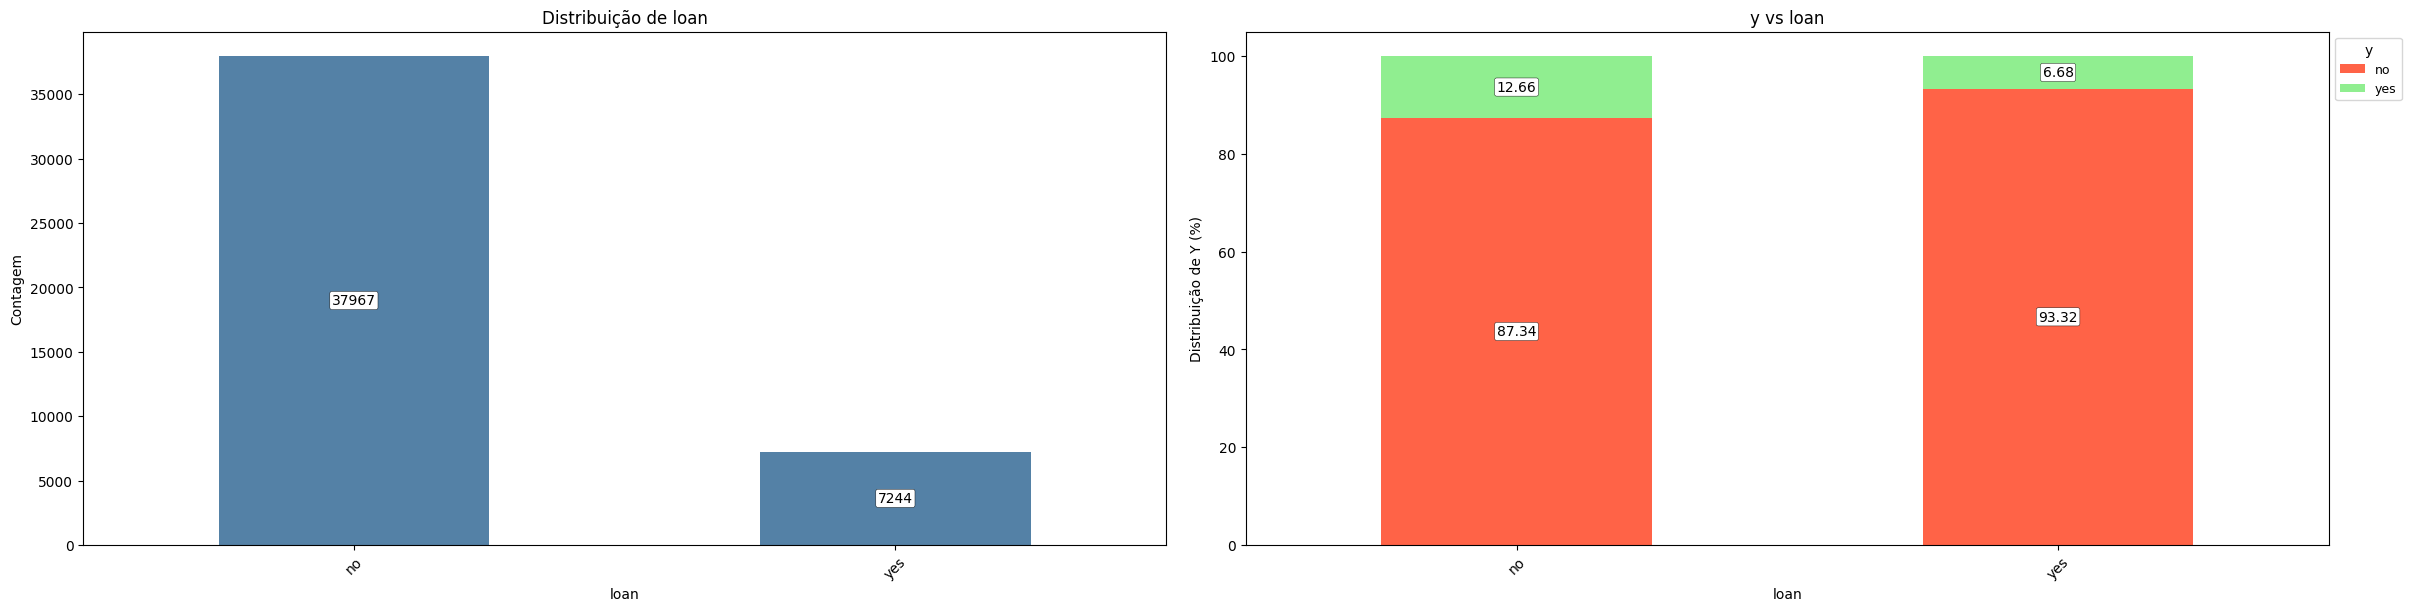

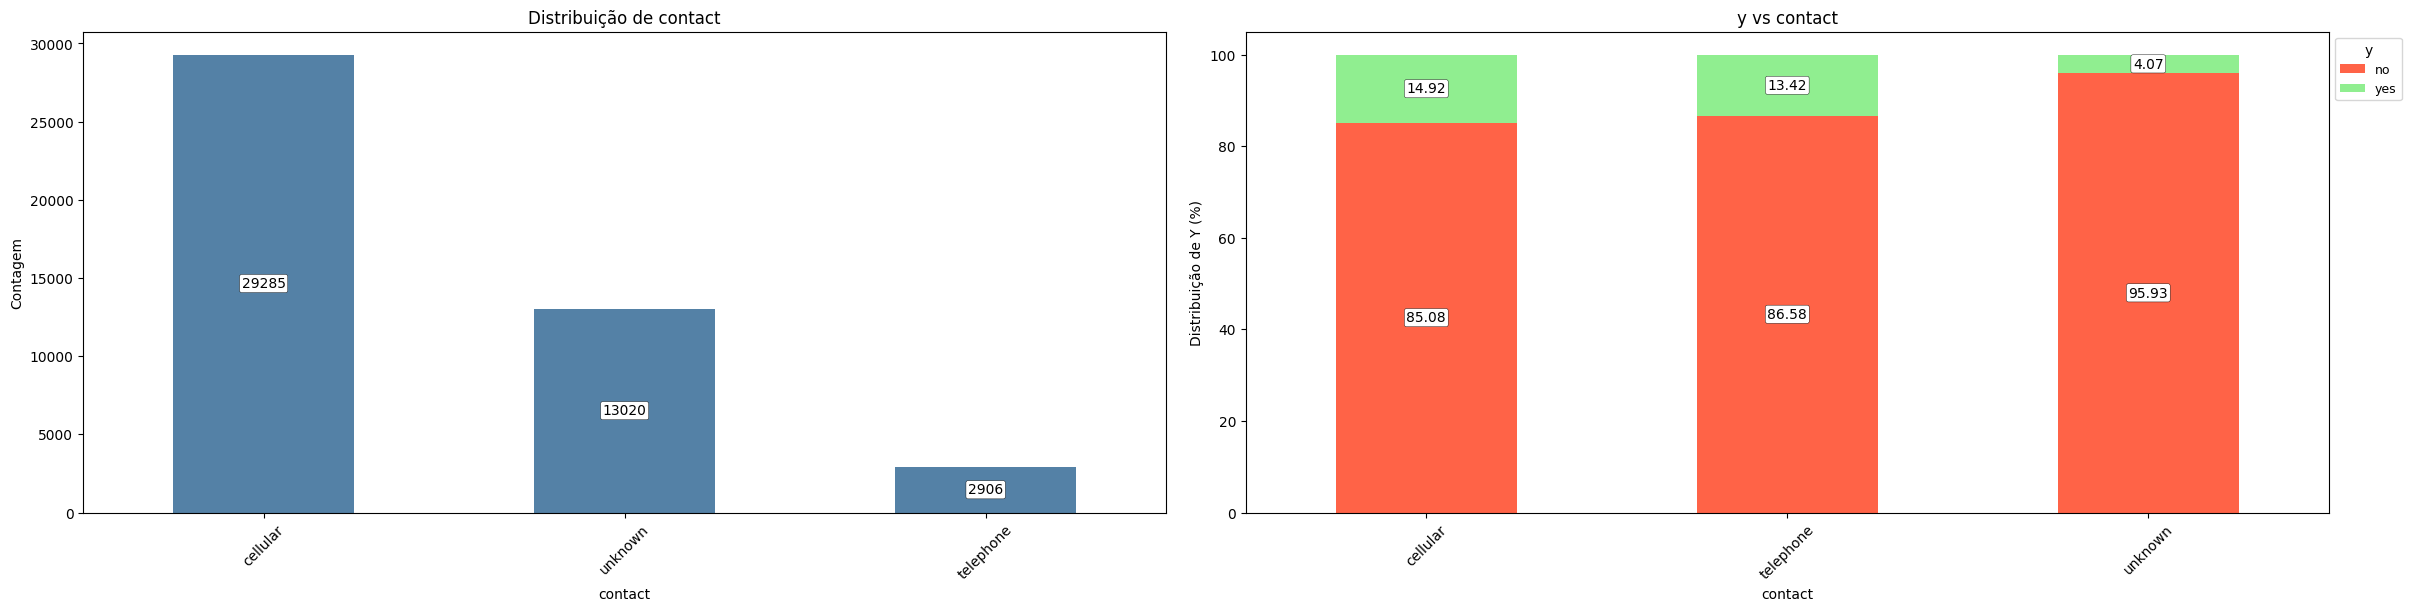

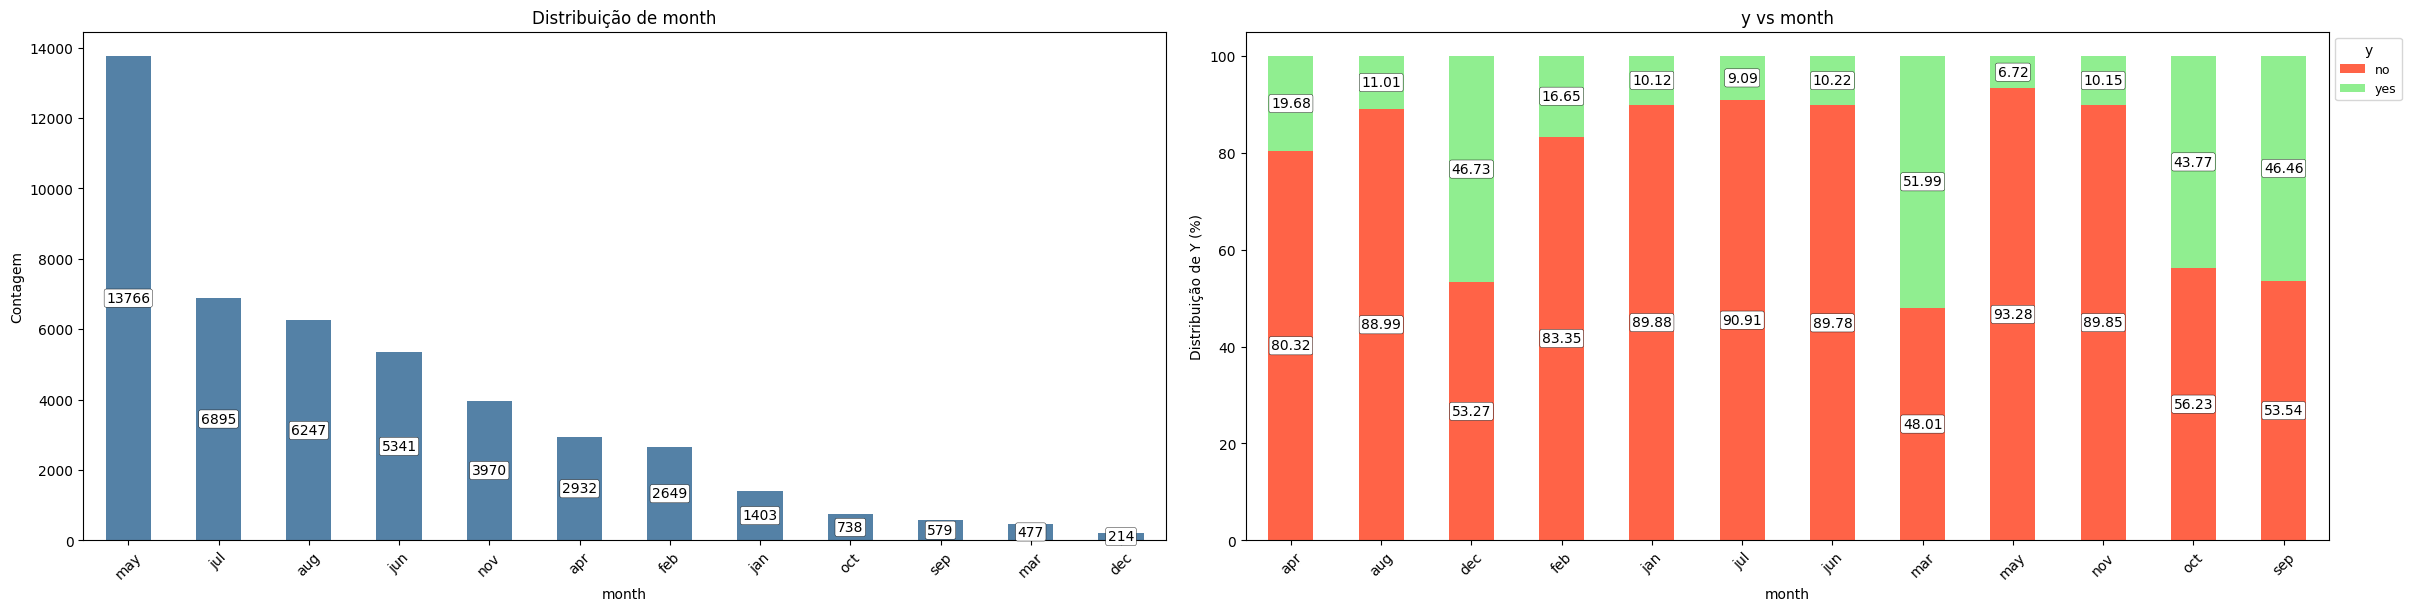

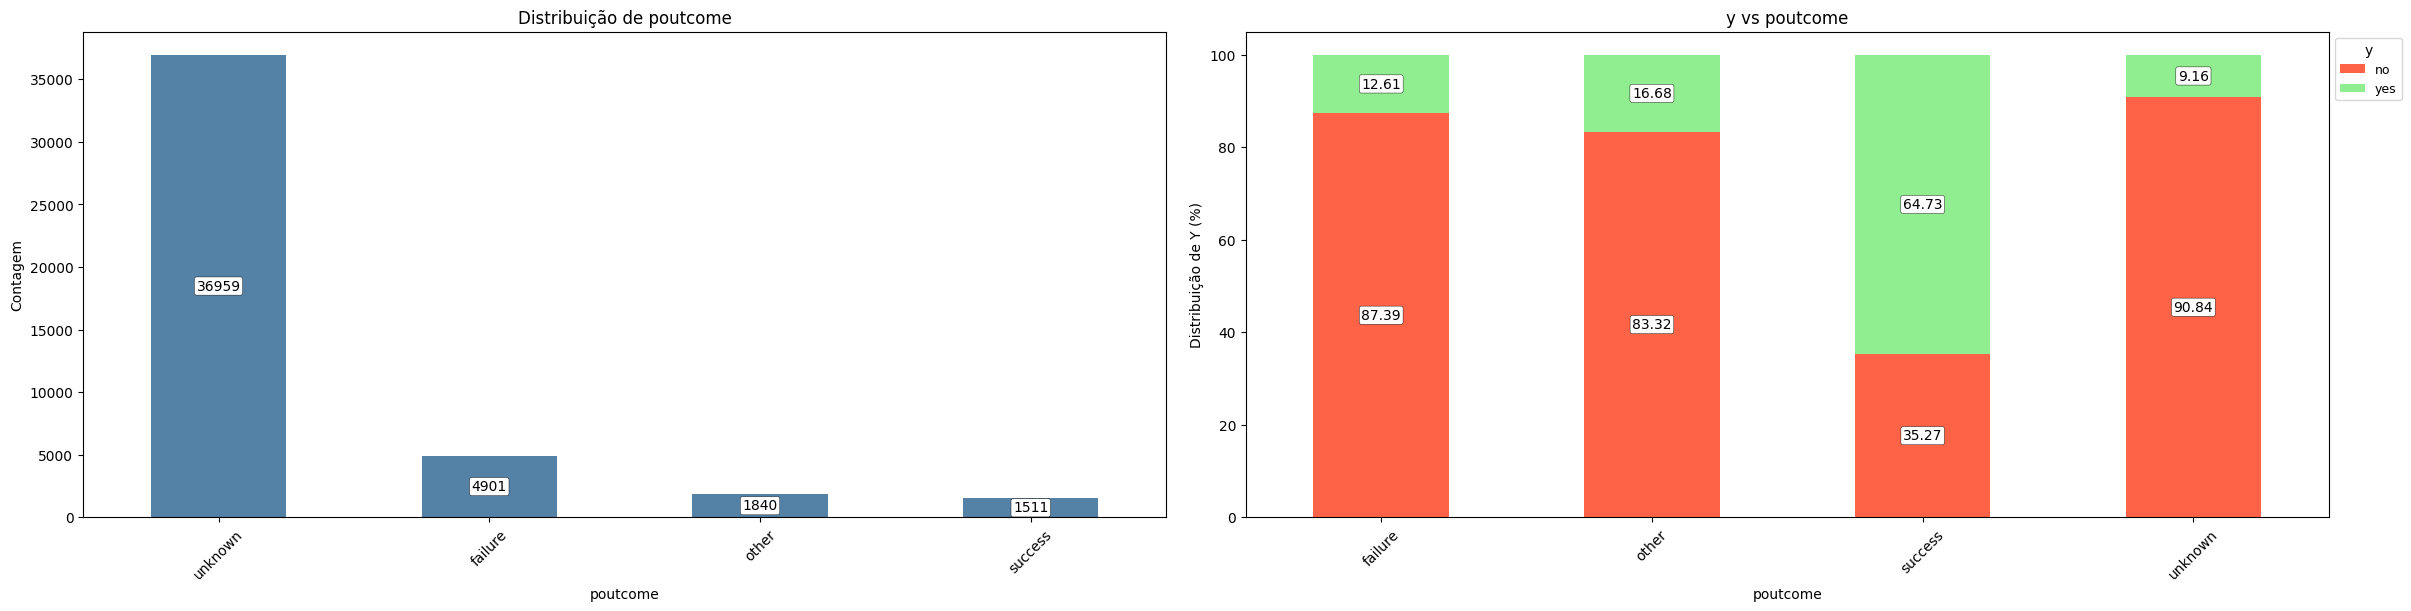

In [12]:
# Estilo de caixa para os valores nas barras
bbox = {'boxstyle': 'round', 'facecolor': '#ffffff', 'linewidth': 0.3, 'pad': 0.15}

# Paleta padrão
sns.set_palette("pastel")

def plot_column_vs_y(df, col, figsize=(24, 6)):
    fig, ax = plt.subplots(1, 2, figsize=figsize, layout='constrained')

    # Cálculo da distribuição percentual de Y por categoria
    df_percent = (df.groupby([col, 'y']).size() / df.groupby(col).size() * 100).unstack().round(2)
    if 'no' in df_percent.columns and 'yes' in df_percent.columns:
        df_percent = df_percent[['no', 'yes']]

    # Gráfico de barras empilhadas (percentual de Y por categoria)
    df_percent.plot(kind='bar', stacked=True, ax=ax[1], color=['tomato', 'lightgreen'])
    for container in ax[1].containers:
        ax[1].bar_label(container, label_type='center', bbox=bbox)
    ax[1].set(title=f'y vs {col}', xlabel=col, ylabel='Distribuição de Y (%)')
    ax[1].legend(title='y', loc='upper left', bbox_to_anchor=(1, 1), fontsize=9, title_fontsize=10)
    ax[1].tick_params(axis='x', rotation=45)

    # Gráfico de contagem das categorias
    df_count = df[col].value_counts().reset_index()
    df_count.columns = [col, 'Contagem']
    sns.barplot(data=df_count, x=col, y='Contagem', ax=ax[0], color='steelblue', width=0.5)
    ax[0].bar_label(ax[0].containers[0], label_type='center', bbox=bbox)
    ax[0].set(title=f'Distribuição de {col}', xlabel=col, ylabel='Contagem')
    ax[0].tick_params(axis='x', rotation=45)

    plt.show()

# Executa a função para cada coluna categórica
colunas_categoricas = df_silver.select_dtypes(include='object').columns.tolist()
colunas_categoricas.remove('y')
for col in colunas_categoricas:
    plot_column_vs_y(df_silver, col)

Através do cruzamento das informações de cada uma das classes com a variável target 'y', podemos confirmar a **primeira de nossas hipóteses iniciais**:

- Clientes que já possuem empréstimos de fato tendem a não contratar novos produtos financeiros. Provavelmente são clientes que não querem compremeter mais uma parcela de sua renda com investimentos.

## 2.5 Hipóteses

Para validar as demais hipóteses, podemos também trabalhar com o histograma, mas é necessário algumas adequações. Como o valor da variável 'balance' é numérica e contínua, precisamos agrupar esses valores em faixas de renda que facilitem a visualização.

- Feito isso, podemos ver a distribuição das classes da variável target para cada faixa de renda e comprovar que quanto maior o saldo financeiro do cliente, maior sua tendência a aderir a campanha de marketing. Neste caso, o grupo com saldo mairo que 10 mil anuais adquiriram o novo investimento em 16,47% das vezes.

- A última hipótese, de que os clientes que são contatados mais de uma vez tendem a não fechar a campanha, também se tornou verdadeira. A partir do cruzamento podemos ver que o índice de adesão vai diminuindo progressivamente conforme aumentam o número de vezes em que a pessoa é contatada.

/tmp/ipython-input-12-1574626791.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_percent = (df.groupby([col, 'y']).size() / df.groupby(col).size() * 100).unstack().round(2)
/tmp/ipython-input-12-1574626791.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_percent = (df.groupby([col, 'y']).size() / df.groupby(col).size() * 100).unstack().round(2)


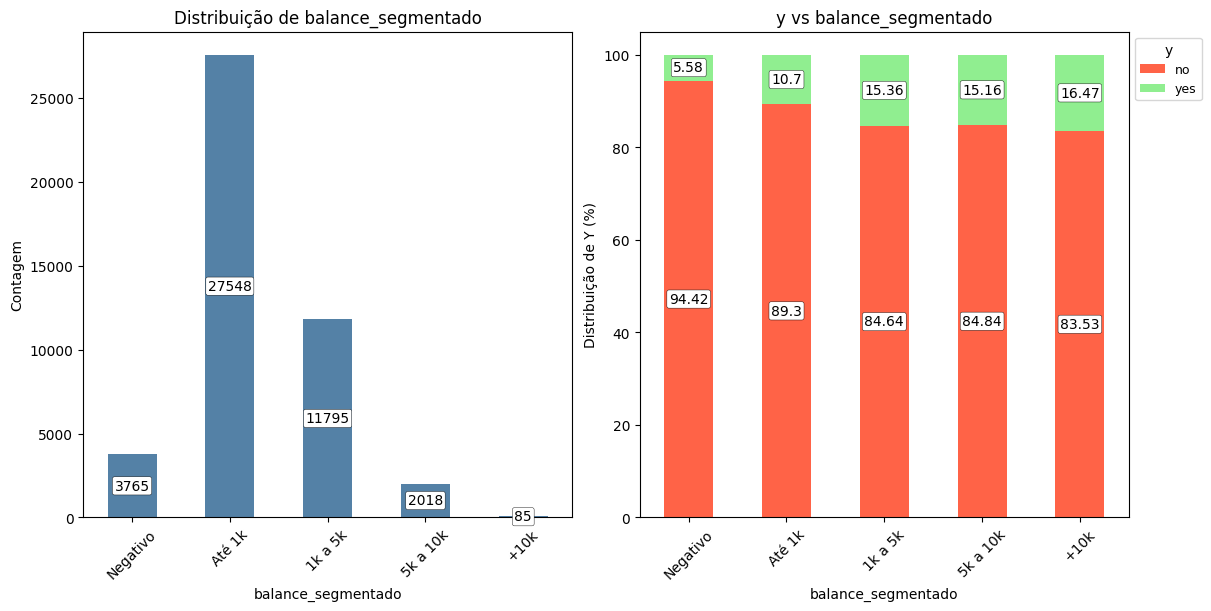

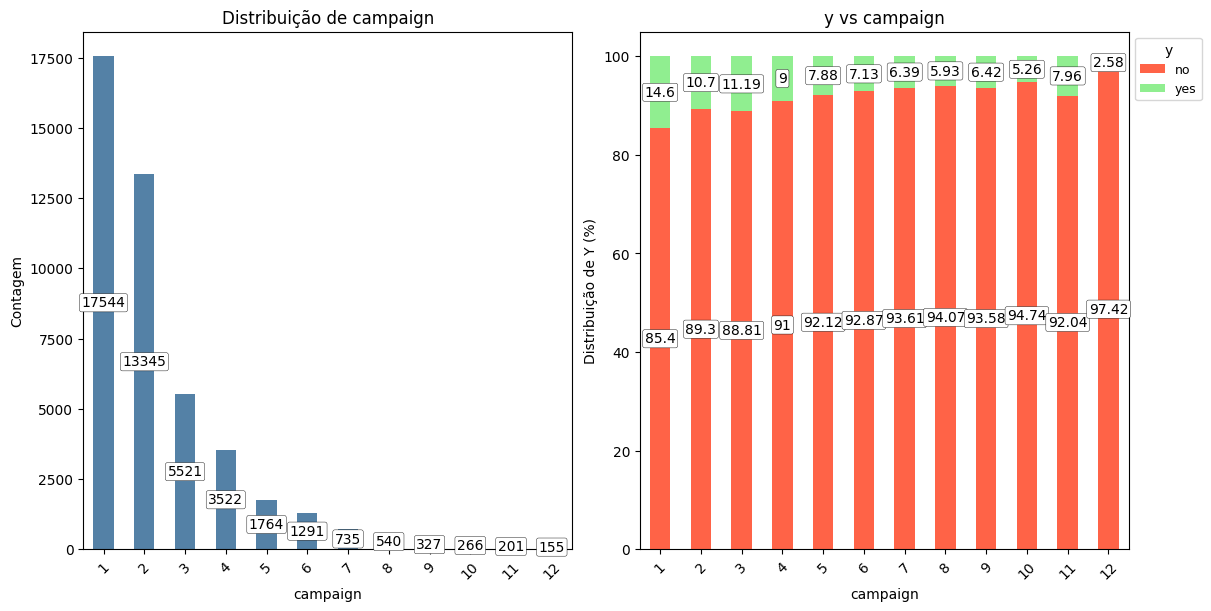

In [13]:
# Segmenta a coluna 'balance' em faixas de renda

# Define os limites das faixas de renda
bins = [-float('inf'), 0, 1000, 5000, 10000, float('inf')]
labels = ['Negativo', 'Até 1k', '1k a 5k', '5k a 10k', '+10k']

df_silver['balance_segmentado'] = pd.cut(df_silver['balance'], bins=bins, labels=labels, right=False)

# Analisar a distribuição de Y por faixa de renda
plot_column_vs_y(df_silver, 'balance_segmentado', figsize=(12, 6))
plot_column_vs_y(df_silver, 'campaign', figsize=(12, 6))


##2.6 Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

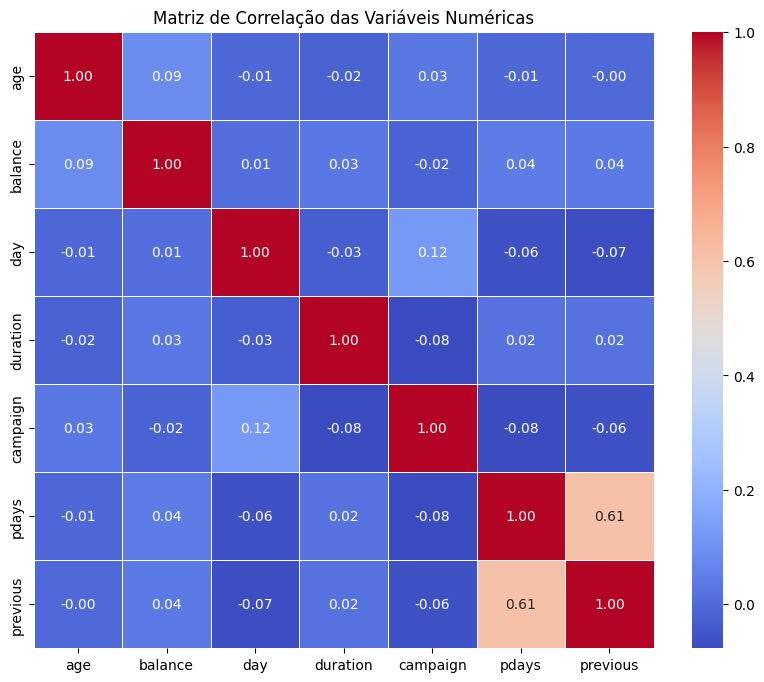

In [14]:
# Calcula a matriz de correlação para as colunas numéricas
correlation_matrix = df_silver[colunas_numericas].corr()

# Plota o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


Para o dataset utilizado, só existe uma correlação significativa entre a variável **'pdays'**, que mostra a quantidade de dias desde o último contato de uma campanha anterior, e **'previous'**, que é o número de contatos realizados antes da campanha.

Esta correlação se deve, provavelmente, ao número de novos clientes em campanhas de marketing. Como muitos dos clientes nunca haviam participado de campanhas(-1), compartilham do mesmo número de contatos anteriores, zero. Esta informação é relevante no momento da seleção de características para o modelo.

In [15]:
# Encontrando a moda
vars = ['pdays', 'previous']

for var in vars:
  moda = df[var].mode()[0]
  mediana = df[var].median()
  if moda == mediana:
    print(f"Tanto a moda como a mediana da coluna '{var}' são: {moda}")
  else:
    print(f"A moda de '{var}' é: {moda}. A sua mediana é de {mediana}")


Tanto a moda como a mediana da coluna 'pdays' são: -1
Tanto a moda como a mediana da coluna 'previous' são: 0


Finalizando as transformações e limpezadas necessárias no dataset, temos uma versão final dos dados preparada para ser usada para modelagem e análises futuras.

In [16]:
df_gold = df_silver.copy()

#3 Pré-Processamento de Dados
##3.1 Divisão entre teste e treino

Após o reconhecimento das informações contidas no dataset, começa a etapa de pré-processamento de dados, crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [17]:
# Remover variáveis de análise do dataset e separar em variáveis independnetes da variável dependente

# Separar features (X) e target (y). Trocando os valores binário de y por 1/0
X = df_gold.drop(['y','duration','balance_segmentado'], axis=1)
y = df_gold['y']
df_gold['y'].map({'no': 0, 'yes': 1})

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


Como a base é uma base desbalanceada, é importante que a divisão entre datasets de treino e teste respeitem esta proporção. Por isso faremos uma divisão estratificada.

In [18]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (31647, 15)
Dimensões de X_test: (13564, 15)
Dimensões de y_train: (31647,)
Dimensões de y_test: (13564,)


## 3.2 Encoding

A one-hot encoding é uma técnica de pré-processamento que transforma variáveis categóricas nominais em um formato numérico binário, criando uma coluna para cada categoria que recebe 1 quando presente e 0 caso contrário. Isso é importante porque muitos algoritmos de machine learning só aceitam dados numéricos, além disso, impede que os algoritmos entendam hierarquias em variáveis categóricas.


In [19]:
# Configurar o OneHotEncoder. Removendo uma das variável para não gerar nenhuam dummy variable
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Aplicar o encoder às colunas categóricas das bases de teste e treino
X_train_encoded = encoder.fit_transform(X_train[colunas_categoricas])
X_test_encoded = encoder.transform(X_test[colunas_categoricas])

Y_train_encoded = encoder.fit_transform(X_train[colunas_categoricas])
Y_test_encoded = encoder.transform(X_test[colunas_categoricas])

# Converter os resultados codificados em DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(colunas_categoricas), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(colunas_categoricas), index=X_test.index)

# Concatenar os resultados codificados com as colunas numéricas restantes
X_train_final = pd.concat([X_train, X_train_encoded_df], axis=1)
X_train_final.drop(colunas_categoricas, axis=1, inplace=True)

X_test_final = pd.concat([X_test, X_test_encoded_df], axis=1)
X_test_final.drop(colunas_categoricas, axis=1, inplace=True)

## 3.3 Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [20]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train_final)
X_train_normalized = scaler_norm.transform(X_train_final)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test_final)

# Converter as bases normalizadas em um DataFrame
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train_final.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test_final.columns)

## 3.4 Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [21]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train_final)
X_train_standardized = scaler_std.transform(X_train_final)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test_final)

# Converter as bases normalizadas em um DataFrame
X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=X_train_final.columns)
X_test_standardized_df = pd.DataFrame(X_test_standardized, columns=X_test_final.columns)

## 3.5 Redução de Dimensionalidade

A redução da dimensionalidade do dataset é uma etapa crucial no pré-processamento de dados, especialmente após a aplicação de técnicas de encoding, como o one-hot encoding, que podem gerar um grande número de variáveis categóricas binárias. Esse aumento na dimensionalidade pode levar à chamada "maldição da dimensionalidade", que dificulta o aprendizado dos modelos, aumenta o tempo de processamento e pode resultar em overfitting, comprometendo a generalização. Ao reduzir a dimensionalidade, é possível eliminar variáveis redundantes ou irrelevantes, facilitar a visualização dos dados, melhorar a performance dos algoritmos de machine learning e tornar o modelo mais interpretável e eficiente. Técnicas como PCA (Análise de Componentes Principais) ou seleção de atributos ajudam a manter apenas as informações mais relevantes, otimizando tanto o desempenho quanto a robustez dos modelos.

Para este projeto, iremos utilizar a redução de dimensionalidade pela técnica SelectKBest, que é uma seleção de atributos (feature selection) que permite escolher as k melhores variáveis preditoras de um conjunto de dados com base em uma função estatística. Ele é especialmente útil após processos como encoding, que podem gerar muitas novas colunas — algumas das quais podem ser irrelevantes ou redundantes para o modelo.

In [22]:
# Feature Selection

feature_selection = ('KBest', SelectKBest(score_func=f_classif, k=8))

# Teste da aplicação do método SelectKBest no dataset pós-One Hot Encoding

Kbest = SelectKBest(score_func=f_classif, k=8)
X_Kbest = X_train_final.values
y_Kbest = y_train.values

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = Kbest.fit(X_Kbest, y_Kbest)

# Reduz X para os atributos selecionados
features = Kbest.transform(X_Kbest)

# Resultados
print('\nNúmero original de atributos:', X_train_final.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", X_train_final.columns)

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", Kbest.get_feature_names_out(input_features=X_train_final.columns))

X_train_kbest = pd.DataFrame(features, columns=Kbest.get_feature_names_out(input_features=X_train_final.columns))


Número original de atributos: 41

Número reduzido de atributos: 8

Atributos Originais: Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

Scores dos Atributos Originais: [5.881e+00 1.843e+02 2.216e+01 1.727e+02 3.251e+02 6.466e+02 1.764e+02
 8.704e+00 1.105e+01 4.560e+01 1.755e+02 5.766e-01 2.015e+01 2.292e+02
 5.196e

In [23]:
# Aplicar o Kbest na base de teste x de teste

X_test_kbest = Kbest.transform(X_test_final.values)
X_test_kbest_df = pd.DataFrame(X_test_kbest, columns=Kbest.get_feature_names_out(input_features=X_test_final.columns), index=X_test_final.index)

print("\nDimensões de X_test após SelectKBest:", X_test_kbest_df.shape)



Dimensões de X_test após SelectKBest: (13564, 8)


#4. Conclusão

A análise de dados é uma etapa fundamental na construção de modelos preditivos, pois vai muito além do preparo dos dados para algoritmos: ela oferece uma compreensão profunda do comportamento dos clientes e das variáveis envolvidas. Através do cruzamento das informações de cada classe com a variável alvo y, foi possível confirmar hipóteses relevantes e extrair insights que enriquecem tanto o modelo quanto a tomada de decisão.

As hipóteses levantadas no início do projeto foram validadas:
- Clientes que já possuem empréstimos ativos demonstram menor propensão a adquirir novos produtos financeiros, provavelmente por evitarem comprometer ainda mais sua renda.
- Ao analisar a distribuição da variável target por faixas de renda, observamos que quanto maior o saldo financeiro do cliente, maior é sua taxa de adesão à campanha de marketing — sendo que clientes com saldo acima de R$ 10 mil anuais aderiram à campanha em 16,47% dos casos.
- Os dados mostraram que a taxa de adesão cai progressivamente conforme aumenta o número de vezes que o cliente é contatado.

Esses achados demonstram como a análise exploratória é essencial para revelar padrões de comportamento, ajustar estratégias de abordagem e construir modelos mais assertivos e embasados na realidade dos dados.